In [1]:
import rasterio
import rasterio.plot

In [2]:
# pip install rasterio

In [3]:
# import rasterio
# import rasterio.plot

In [4]:
import pandas as pd
import shapely
import geopandas as gpd

In [5]:
import glob

In [6]:
import matplotlib.pyplot as plt

In [7]:
import os
import scipy.ndimage

In [8]:
src = rasterio.open ('/Users/shazia_manuawar/Documents/data/BSV_res200-M.tif')

In [9]:
src.transform

Affine(2.0, 0.0, 170000.0,
       0.0, -2.0, 580000.0)

In [10]:
#top left of the raster
src.transform * (0, 0)

(170000.0, 580000.0)

In [11]:
#bottom right corner of the raster
src.transform * (src.width, src.height)

(190000.0, 560000.0)

In [12]:
src.bounds

BoundingBox(left=170000.0, bottom=560000.0, right=190000.0, top=580000.0)

- Q. How can we create a GeoDataFrame with one polygon feature, representing the raster bounds?

In [13]:
gdf = gpd.GeoDataFrame (src.bounds)

In [14]:
gdf

,0
0,170000.0
1,560000.0
2,190000.0
3,580000.0


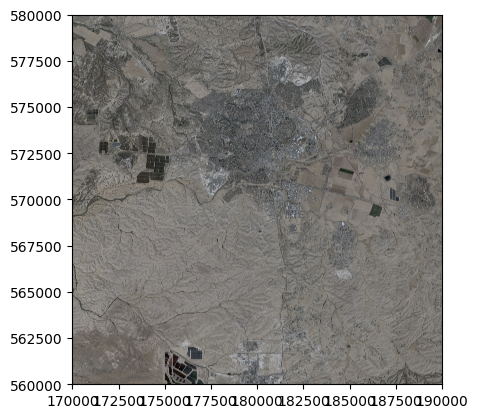

<Axes: >

In [15]:
rasterio.plot.show(src)

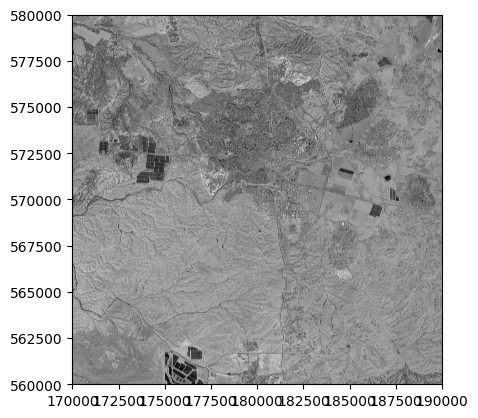

<Axes: >

In [16]:
rasterio.plot.show ((src, 1) , cmap = 'Greys_r')

### Variable length positional arguments (*)

In [17]:
def paste(*args):
    result = ''
    for arg in args:
        result += str(arg)  # Convert each item to a string and add to result
    return result

In [18]:
paste('Hello','World')

'HelloWorld'

In [19]:
paste('A','B','C',1,2,3)

'ABC123'